# Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import auc,classification_report,mean_squared_error,roc_curve,confusion_matrix,accuracy_score
from glmnet import LogitNet
%matplotlib inline


# Reading the text file data and converting into a dataframe

In [25]:
data_frame = pd.read_csv("DScasestudy1.txt", delimiter="\t")
data_frame.shape


(530, 16563)

In [26]:
data_frame.head(5)


,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_frame.columns


Index(['response', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V16553', 'V16554', 'V16555', 'V16556', 'V16557', 'V16558', 'V16559',
       'V16560', 'V16561', 'V16562'],
      dtype='object', length=16563)

# Separating out the reponse column and the input columns 

In [28]:
variables = data_frame.drop(['response'], axis =1)
response = data_frame[['response']]


In [29]:
print("data shape of variables",variables.shape)


data shape of variables (530, 16562)


In [30]:
print("data shape of response",response.shape)


data shape of response (530, 1)


# Checking the head of variables and response dataset's

In [31]:
variables.head(10)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
response.head(10)


,response
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# Checking the tail of variables and response dataset's

In [33]:
variables.tail(10)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
520,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
522,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
524,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
525,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
526,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
527,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
528,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
529,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
response.tail(10)


,response
520,0
521,0
522,0
523,0
524,0
525,0
526,0
527,0
528,0
529,0


# Performing summary Statistics and getting to know about Variables dataset

In [35]:
variables.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 16562 entries, V1 to V16562
dtypes: int64(16562)
memory usage: 67.0 MB


In [36]:
variables.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
count,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000,530.000000,530.0,530.0,...,530.000000,530.0,530.0,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000
mean,0.009434,0.009434,0.001887,0.0,0.020755,1.0,0.001887,0.030189,0.0,0.0,...,0.158491,0.0,0.0,0.001887,0.020755,0.013208,0.0,0.003774,0.0,0.447170
std,0.096761,0.096761,0.043437,0.0,0.142697,0.0,0.043437,0.171268,0.0,0.0,...,0.365545,0.0,0.0,0.043437,0.142697,0.114270,0.0,0.061371,0.0,0.497671
min,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0,0.0,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


# Checking whether there are any Null Values in the Variables DataSet 

In [37]:
#variables.isnull().any()
#getting the sum of all null values present in the variables dataset
variables.isnull().sum().sum()


0

# Checking Null values in the Response DataSet

In [38]:
response.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 1 columns):
response    530 non-null int64
dtypes: int64(1)
memory usage: 4.2 KB


In [39]:
response.describe()


,response
count,530.000000
mean,0.232075
std,0.422556
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [40]:
response.isnull().sum().sum()


0

# Plotting the Histogram to see How many 0's and 1's present in the respone Dataset

In [41]:
print("number of unique values",response['response'].nunique())
unique_values_count = response['response'].value_counts()
print("value counts of unique values\n",unique_values_count)


number of unique values 2
value counts of unique values
 0    407
1    123
Name: response, dtype: int64


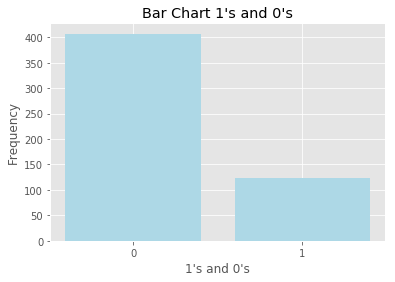

In [42]:
#plotting the bar chart for o's and 1's with frequency
plt.style.use('ggplot')

x = ['0', '1']

unique_values_frequency = [407, 123]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, unique_values_frequency, color='lightblue')
plt.xlabel("1's and 0's")
plt.ylabel("Frequency")
plt.title("Bar Chart 1's and 0's")

plt.xticks(x_pos, x)

plt.show()


# Functions to calculate the train and test errors

In [43]:
def calc_train_error(X_train, y_train,model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error


# Splitting into train and test datasets with different test sizes and predicting using GLMNET python for performing Lasso Regression

In [44]:
#splitting data into training and testing phases
data = variables
target = response


# Choosing Test_size = 0.4

In [45]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(data,target,test_size=0.4,shuffle=True, random_state=15)


In [46]:
model = LogitNet()
print(model.fit)
model4 = model.fit(x_train4,y_train4)
print(model4.alpha)
print(model4.lambda_best_)
predictions4 = model4.predict(x_test4)


<bound method LogitNet.fit of LogitNet(alpha=1, cut_point=1.0, fit_intercept=True, lambda_path=None,
     max_iter=100000, min_lambda_ratio=0.0001, n_jobs=1, n_lambda=100,
     n_splits=3, random_state=None, scoring=None, standardize=True,
     tol=1e-07, verbose=False)>


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
[0.14001049]


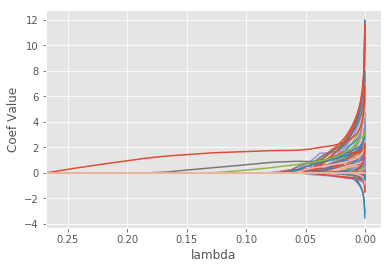

In [47]:
for i in range(model4.coef_path_.shape[1]):
    plt.plot(model4.lambda_path_, model4.coef_path_[0, i, :])
ax = plt.gca()
ax.set_xlim(right=model4.lambda_path_.max())
ax.set_xlabel("lambda")
ax.set_ylabel("Coef Value")
ax.invert_xaxis()
plt.show()


In [48]:
confusion_matrix(y_test4,predictions4)


array([[163,   2],
       [ 19,  28]])

In [49]:
print(classification_report(y_test4,predictions4))
print("mean squared error",mean_squared_error(y_test4,predictions4))


             precision    recall  f1-score   support

          0       0.90      0.99      0.94       165
          1       0.93      0.60      0.73        47

avg / total       0.90      0.90      0.89       212

mean squared error 0.09905660377358491


# selecting test_size 0.3

In [50]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(data,target,test_size=0.3,shuffle=True, random_state=15)


In [51]:
model3 = model.fit(x_train3,y_train3)
print(model3.alpha)
print(model3.lambda_best_)
predictions3 = model3.predict(x_test3)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
[0.14147292]


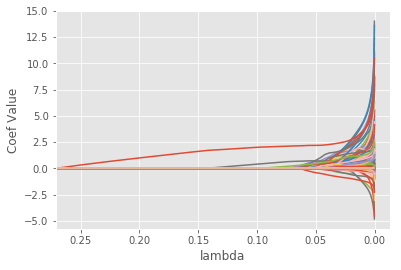

In [52]:
for i in range(model3.coef_path_.shape[1]):
    plt.plot(model3.lambda_path_, model3.coef_path_[0, i, :])
ax = plt.gca()
ax.set_xlim(right=model3.lambda_path_.max())
ax.set_xlabel("lambda")
ax.set_ylabel("Coef Value")
ax.invert_xaxis()
plt.show()


In [53]:
confusion_matrix(y_test3,predictions3)


array([[121,   1],
       [ 16,  21]])

In [54]:
print(classification_report(y_test3,predictions3))
print("mean squared error",mean_squared_error(y_test3,predictions3))


             precision    recall  f1-score   support

          0       0.88      0.99      0.93       122
          1       0.95      0.57      0.71        37

avg / total       0.90      0.89      0.88       159

mean squared error 0.1069182389937107


# selecting testsize 0.25

In [55]:
x_train25, x_test25, y_train25, y_test25 = train_test_split(data,target,test_size=0.25,shuffle=True, random_state=15)


In [56]:
model25 = model.fit(x_train25,y_train25)
print(model25.alpha)
print(model25.lambda_best_)
predictions25 = model25.predict(x_test25)
predict_prob = model25.predict_proba(x_test25)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
[0.16074708]


In [57]:
np.unique(predict_prob[:,1])


array([0.18356172, 0.51899507])

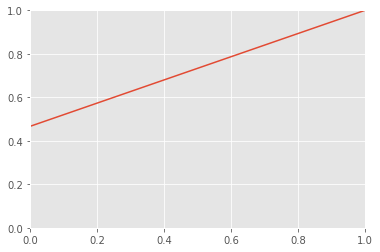

0.7333333333333334

In [58]:
fpr,tpr,_ = roc_curve(y_test25,predict_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
auc(fpr,tpr)


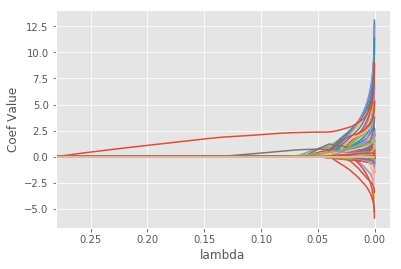

In [59]:
for i in range(model25.coef_path_.shape[1]):
    plt.plot(model25.lambda_path_, model25.coef_path_[0, i, :])
ax = plt.gca()
ax.set_xlim(right=model25.lambda_path_.max())
ax.set_xlabel("lambda")
ax.set_ylabel("Coef Value")
ax.invert_xaxis()
plt.show()


In [60]:
confusion_matrix(y_test25,predictions25)


array([[103,   0],
       [ 16,  14]])

In [61]:
print(classification_report(y_test25,predictions25))
print("mean squared error",mean_squared_error(y_test25,predictions25))


             precision    recall  f1-score   support

          0       0.87      1.00      0.93       103
          1       1.00      0.47      0.64        30

avg / total       0.90      0.88      0.86       133

mean squared error 0.12030075187969924


# selecting testsize 0.2

In [62]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data,target,test_size=0.2,shuffle=True, random_state=15)


In [63]:
model2 = model.fit(x_train2,y_train2)
print(model2.alpha)
print(model2.lambda_best_)
predictions2 = model2.predict(x_test2)
predict_proba = model2.predict_proba(x_test2)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
[0.1606137]


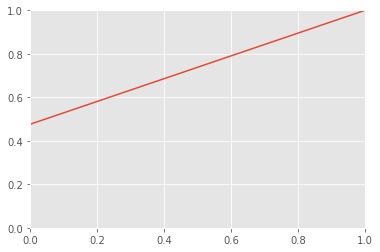

0.7380952380952381

In [64]:
fpr,tpr,_ = roc_curve(y_test2,predict_proba[:,1])
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
auc(fpr,tpr)


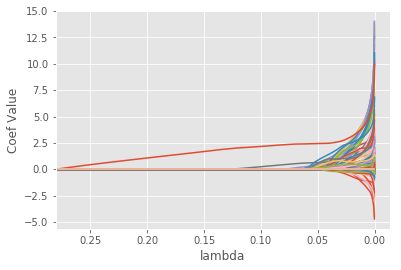

In [65]:
for i in range(model2.coef_path_.shape[1]):
    plt.plot(model2.lambda_path_, model2.coef_path_[0, i, :])
ax = plt.gca()
ax.set_xlim(right=model2.lambda_path_.max())
ax.set_xlabel("lambda")
ax.set_ylabel("Coef Value")
ax.invert_xaxis()
plt.show()


In [66]:
confusion_matrix(y_test2,predictions2)


array([[85,  0],
       [11, 10]])

In [67]:
print(classification_report(y_test2,predictions2))
print("mean squared error",mean_squared_error(y_test2,predictions2))


             precision    recall  f1-score   support

          0       0.89      1.00      0.94        85
          1       1.00      0.48      0.65        21

avg / total       0.91      0.90      0.88       106

mean squared error 0.10377358490566038


In [70]:
confusion_matrix(y_test2,predictions2)


array([[85,  0],
       [11, 10]])

In [72]:
print(classification_report(y_test2,predictions2))
print("mean squared error",mean_squared_error(y_test2,predictions2))


             precision    recall  f1-score   support

          0       0.89      1.00      0.94        85
          1       1.00      0.48      0.65        21

avg / total       0.91      0.90      0.88       106

mean squared error 0.10377358490566038


# Calculating training and testing errors for all test sizes

In [73]:
def errors(trainig_x,training_y,testing_x,testing_y,your_model):
    print("train_error",calc_train_error(trainig_x,training_y,your_model))
    print("test_error",calc_validation_error(testing_x,testing_y,your_model))
    print("metrics",calc_metrics(trainig_x,training_y,testing_x,testing_y,your_model))
    

In [74]:
#train test error for test_size 0.4
errors(x_train4,y_train4,x_test4,y_test4,model4)


train_error 0.12578616352201258
test_error 0.09905660377358491


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


metrics (0.12578616352201258, 0.09905660377358491)


In [75]:
#train test error for test_size 0.3
errors(x_train3,y_train3,x_test3,y_test3,model3)


train_error 0.11859838274932614
test_error 0.1069182389937107


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


metrics (0.11859838274932614, 0.1069182389937107)


In [76]:
#train test error for test_size 0.25
errors(x_train25,y_train25,x_test25,y_test25,model25)


train_error 0.11335012594458438
test_error 0.12030075187969924


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


metrics (0.11335012594458438, 0.12030075187969924)


In [77]:
#train test error for test_size 0.2
errors(x_train2,y_train2,x_test2,y_test2,model2)


train_error 0.1179245283018868
test_error 0.10377358490566038


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


metrics (0.1179245283018868, 0.10377358490566038)


# splitting my dataset into train, validation and test datasets

In [78]:
X_intermediate, X_test, y_intermediate, y_test = train_test_split(data, 
                                                                  target, 
                                                                  shuffle=True,
                                                                  test_size=0.2, 
                                                                  random_state=15)

# train/validation split (gives us train and validation sets)
X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate,
                                                                y_intermediate,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=2018)


In [79]:
model_s = model.fit(X_train,y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
# delete intermediate variables
del X_intermediate, y_intermediate

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(target),2),
                                                       round(len(y_validation)/len(target),2),
                                                       round(len(y_test)/len(target),2)))


train: 0.6% | validation: 0.2% | test 0.2%


In [81]:
# calculate errors
new_train_error = mean_squared_error(y_train, model_s.predict(X_train))
new_validation_error = mean_squared_error(y_validation, model_s.predict(X_validation))
new_test_error = mean_squared_error(y_test, model_s.predict(X_test))

print("new train error",new_train_error)
print("new test error", new_test_error)
print("new validation error", new_validation_error)


new train error 0.1069182389937107
new test error 0.10377358490566038
new validation error 0.1509433962264151


# Performing K-Fold Cross Validation and calculating the Metrics plotting the ROC_Curve

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.84      0.99      0.91        79
          1       0.92      0.44      0.60        27

avg / total       0.86      0.85      0.83       106

accuracy_score 0.8490566037735849


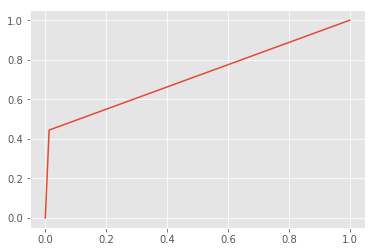

auc 0.7158931082981717


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.90      0.96      0.93        82
          1       0.83      0.62      0.71        24

avg / total       0.88      0.89      0.88       106

accuracy_score 0.8867924528301887


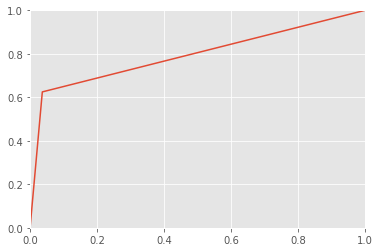

auc 0.7942073170731707


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.85      0.99      0.91        74
          1       0.95      0.59      0.73        32

avg / total       0.88      0.87      0.86       106

accuracy_score 0.8679245283018868


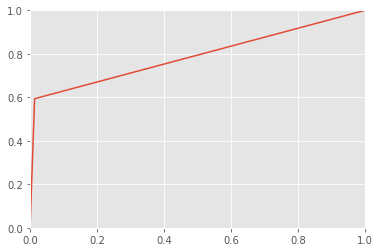

auc 0.7901182432432433


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.92      1.00      0.96        88
          1       1.00      0.56      0.71        18

avg / total       0.93      0.92      0.92       106

accuracy_score 0.9245283018867925


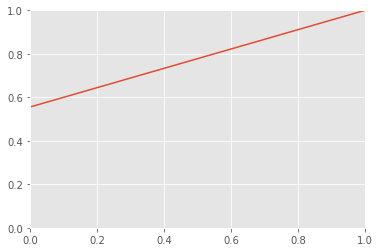

auc 0.7777777777777778


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.89      0.99      0.94        84
          1       0.92      0.55      0.69        22

avg / total       0.90      0.90      0.89       106

accuracy_score 0.8962264150943396


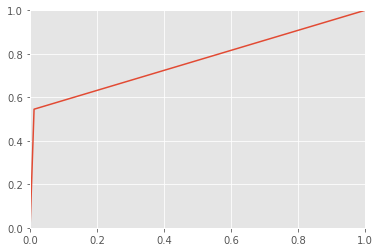

auc 0.7667748917748918


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


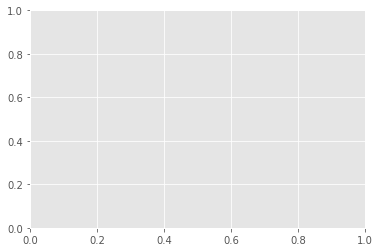

In [82]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=21)
train_errors = []
validation_errors = []
accuracy = []
auc_array= []
for train_index, val_index in kf.split(data,target):
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    # instantiate model
    model_k = model.fit(X_train,y_train)
    predictions = model_k.predict(X_val)
    print(classification_report(y_val,predictions))
    print("accuracy_score",accuracy_score(y_val,predictions))
    accuracy.append(accuracy_score(y_val,predictions))
    predict_prob = model_k.predict_proba(X_val)
    fpr,tpr,_ = roc_curve(y_val,predict_prob[:,1])
    plt.plot(fpr,tpr)
    plt.show()
    plt.xlim(0,1)
    plt.ylim(0,1)
    k = auc(fpr,tpr)
    print("auc",k)
    auc_array.append(k)
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model_k)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
    

In [83]:
print("train_errors",train_errors)
print("validation_errors",validation_errors)


train_errors [0.10613207547169812, 0.11556603773584906, 0.11084905660377359, 0.125, 0.1179245283018868]
validation_errors [0.1509433962264151, 0.11320754716981132, 0.1320754716981132, 0.07547169811320754, 0.10377358490566038]


# Calculating the mean for train, validation, accuracy, Auc mean

In [84]:
print("train_error mean",sum(train_errors)/len(train_errors))
print("validation_error mean",sum(validation_errors)/len(validation_errors))
print("accuracy_mean",sum(accuracy)/len(accuracy))
print("Auc_mean",sum(auc_array)/len(auc_array))

train_error mean 0.11509433962264151
validation_error mean 0.11509433962264151
accuracy_mean 0.8849056603773585
Auc_mean 0.768954267633451
